In [33]:
import numpy as np
import pandas as pd
from scipy import stats
from statsmodels.sandbox.stats.multicomp import multipletests 
import seaborn as sns

Классификатор C4.5 и три его модификации: с оптимизацией гиперпараметра m, гиперпараметра cf и с одновременной оптимизацией обоих гиперпараметров. Эти четыре классификатора сравнивались на 14 наборах данных. На каждом датасете был посчитан AUC каждого классификатора. 
Используя критерий знаковых рангов, проведите попарное сравнение каждого классификатора с каждым. Выберите два классификатора, различие между которыми наиболее статистически значимо.

In [16]:
data = pd.read_table('AUCs.txt')
data.head()

C:\Users\1\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


,Unnamed: 0,C4.5,C4.5+m,C4.5+cf,C4.5+m+cf
0,adult (sample),0.763,0.768,0.771,0.798
1,breast cancer,0.599,0.591,0.590,0.569
2,breast cancer wisconsin,0.954,0.971,0.968,0.967
3,cmc,0.628,0.661,0.654,0.657
4,ionosphere,0.882,0.888,0.886,0.898


In [18]:
data.describe()

,C4.5,C4.5+m,C4.5+cf,C4.5+m+cf
count,14.000000,14.000000,14.000000,14.000000
mean,0.804929,0.820429,0.808786,0.827214
std,0.160187,0.158583,0.167566,0.154548
min,0.583000,0.583000,0.563000,0.569000
25%,0.636250,0.666500,0.624000,0.673000
50%,0.828500,0.863000,0.876000,0.886500
75%,0.950500,0.968750,0.960250,0.965750
max,1.000000,1.000000,1.000000,1.000000


In [50]:
classifiers = []
for i in data.columns[1:]:
    classifiers.append(i)
c_data = []
for i in range(len(classifiers)):
    for j in range(i+1, len(classifiers)):
        c_data.append([classifiers[i], classifiers[j], stats.wilcoxon(data[classifiers[i]], data[classifiers[j]])[0],
                      stats.wilcoxon(data[classifiers[i]], data[classifiers[j]])[1]])
        
corr_data = pd.DataFrame(c_data, columns=['classifier A', 'classifier B', 'statistics', 'p_values'])
corr_data

,classifier A,classifier B,statistics,p_values
0,C4.5,C4.5+m,6.5,0.010757
1,C4.5,C4.5+cf,43.0,0.861262
2,C4.5,C4.5+m+cf,11.0,0.015906
3,C4.5+m,C4.5+cf,17.0,0.046333
4,C4.5+m,C4.5+m+cf,22.0,0.327826
5,C4.5+cf,C4.5+m+cf,10.0,0.022909


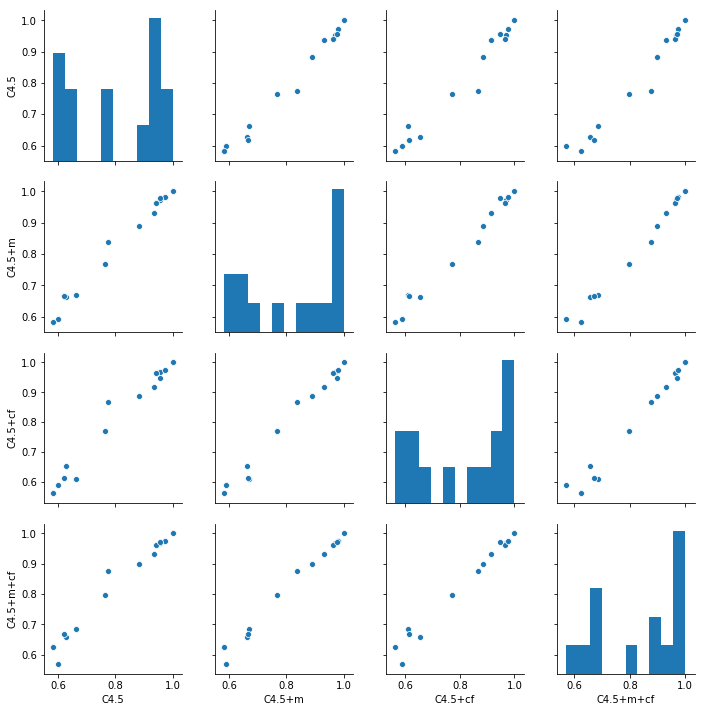

In [34]:
sns.pairplot(data)

Сколько статистически значимых на уровне 0.05 различий мы обнаружили?

In [66]:
(corr_data.p_values < 0.05).value_counts()



True     4
False    2
Name: p_values, dtype: int64

Сравнивая 4 классификатора между собой, мы проверили 6 гипотез. Давайте сделаем поправку на множественную проверку. Начнём с метода Холма. Сколько гипотез можно отвергнуть на уровне значимости 0.05 после поправки этим методом?

In [72]:
rejected, p_corrected, a1, a2 = multipletests(corr_data.p_values, 
                                            alpha = 0.05, 
                                            method = 'holm')
corr_data['rejected_by_holm'] = rejected
corr_data['p_corrected_by_holm'] = p_corrected
corr_data

,classifier A,classifier B,statistics,p_values,rejected_by_holm,p_corrected_by_holm,rejected_by_bh,p_corrected_by_bh
0,C4.5,C4.5+m,6.5,0.010757,False,0.064543,True,0.045818
1,C4.5,C4.5+cf,43.0,0.861262,False,0.861262,False,0.861262
2,C4.5,C4.5+m+cf,11.0,0.015906,False,0.079532,True,0.045818
3,C4.5+m,C4.5+cf,17.0,0.046333,False,0.138998,False,0.069499
4,C4.5+m,C4.5+m+cf,22.0,0.327826,False,0.655651,False,0.393391
5,C4.5+cf,C4.5+m+cf,10.0,0.022909,False,0.091636,True,0.045818


Сколько гипотез можно отвергнуть на уровне значимости 0.05 после поправки методом Бенджамини-Хохберга?

In [73]:
rejected, p_corrected, a1, a2 = multipletests(corr_data.p_values, 
                                            alpha = 0.05, 
                                            method = 'fdr_bh')
corr_data['rejected_by_bh'] = rejected
corr_data['p_corrected_by_bh'] = p_corrected
corr_data

,classifier A,classifier B,statistics,p_values,rejected_by_holm,p_corrected_by_holm,rejected_by_bh,p_corrected_by_bh
0,C4.5,C4.5+m,6.5,0.010757,False,0.064543,True,0.045818
1,C4.5,C4.5+cf,43.0,0.861262,False,0.861262,False,0.861262
2,C4.5,C4.5+m+cf,11.0,0.015906,False,0.079532,True,0.045818
3,C4.5+m,C4.5+cf,17.0,0.046333,False,0.138998,False,0.069499
4,C4.5+m,C4.5+m+cf,22.0,0.327826,False,0.655651,False,0.393391
5,C4.5+cf,C4.5+m+cf,10.0,0.022909,False,0.091636,True,0.045818
